## Keras CNN Model - Loading Images from Drive

### Cat & Dogs classification

In [ ]:
import numpy as np

import keras
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense,  Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization

from keras.layers.convolutional import *

from keras import backend as K


import itertools
from sklearn.metrics import confusion_matrix


import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_path = 'Data/Train'
test_path = 'Data/Test/'
val_path = 'Data/Val/'


In [3]:
train_batches = ImageDataGenerator().flow_from_directory(train_path, target_size=(224,224), classes=['Dog', 'Cat'], batch_size=64)
test_batches = ImageDataGenerator().flow_from_directory(test_path, target_size=(224,224), classes=['Dog', 'Cat'], batch_size=32)
val_batches = ImageDataGenerator().flow_from_directory(val_path, target_size=(224,224), classes=['Dog', 'Cat'], batch_size=16)



Found 18800 images belonging to 2 classes.
Found 4000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


## Display some of the Images & their Labels

Found 18800 images belonging to 2 classes.


c:\users\lord sanmilee\appdata\local\programs\python\python36\lib\site-packages\matplotlib\text.py:1191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


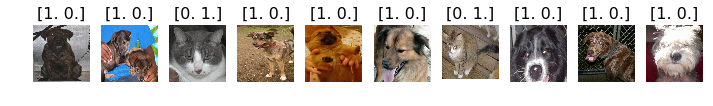

In [4]:
# Plot images with label

def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims) // rows  if  len(ims) % 2 == 0   else  len(ims) // rows + 1
    
    for i in range (len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('off')
        
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')
    

disp_train_batches = ImageDataGenerator().flow_from_directory(train_path, target_size=(224,224), classes=['Dog', 'Cat'], batch_size=10)

    
imgs, labels = next(disp_train_batches)

plots(imgs, titles=labels)

## Model Design

In [5]:
model = Sequential([
        Conv2D(16, (3,3), activation='relu', input_shape=(224,224,3)),
        Flatten(),
        Dense(2, activation='softmax'),
    ])

In [6]:
model.compile(Adam(lr=.001), loss='categorical_crossentropy', metrics=['accuracy'])

### Steps_per_epoch

### Dog train dataset = 9,400 & Cat train dataset = 9,400 
### Total Train data = 18800

#### steps_per_epoch = total image train dataset (both cat & dog) / train batch

#### steps_per_epoch = 18800 /  64  =====> 293.75

In [ ]:

model.fit_generator(train_batches, steps_per_epoch=5,
                   validation_data=val_batches, validation_steps=5, epochs=3, verbose=1)


Epoch 1/3
